<a href="https://colab.research.google.com/github/CristianoDataScience/Analise-Estat-stica-Enem_2019/blob/main/Teste_t_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teste t Student (duas amostras independentes)

#### Amostras pequenas (menos que 30)
#### Não necessita conhecimento do desvio padrão

In [1]:
import numpy as np
import pandas as pd

In [3]:
enem_sp = pd.read_csv('/content/drive/MyDrive/curso estatistica/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,nao_respondeu,NaN,...,600.2,Ingles,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Ingles,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Nao
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,publica,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,publica,NaN,...,419.2,Ingles,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,nao_respondeu,NaN,...,796.1,Ingles,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo: Analisar a diferença entre as médias de dois componentes de redação do colégio y.

In [4]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [5]:
colegioy.shape

(30, 28)

1) Analisar a classificação das variáveis

In [6]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [7]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [11]:
import plotly.express as px
import seaborn as sns

In [9]:
grafico = px.box(colegioy, y='COMP3')
grafico.show()

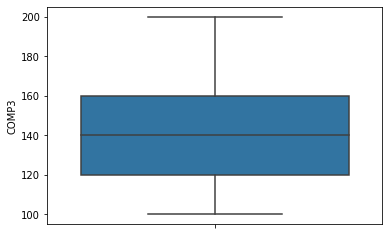

In [13]:
sns.boxplot(data=colegioy, y="COMP3");

In [10]:
grafico = px.box(colegioy, y='COMP5')
grafico.show()

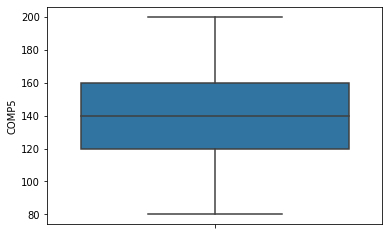

In [14]:
sns.boxplot(data=colegioy, y="COMP5");

4) Analisar Normalidade

### Critérios:

##### Nível de significância de 0,05 ou 5% (Mais utilizado)

##### Quando p > 0,05 (Distribuição normal)

In [25]:
import matplotlib.pyplot as plt
import statsmodels
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

In [21]:
# Teste Shapiro-Wilk
stats.shapiro(colegioy.COMP3)

ShapiroResult(statistic=0.916003406047821, pvalue=0.02115193009376526)

In [19]:
# Teste Shapiro-Wilk
stats.shapiro(colegioy.COMP5) #Distribuição normal

ShapiroResult(statistic=0.9479593634605408, pvalue=0.14903117716312408)

In [22]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegioy.COMP3, dist='norm')

(0.20710628123776997, 0.0022752873084563707)

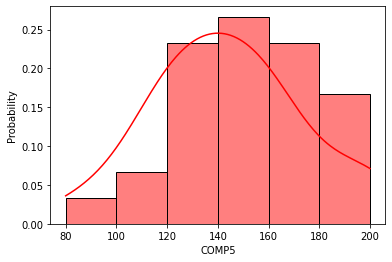

In [26]:
sns.histplot(colegioy, x='COMP5', bins=6, color='red', kde=True, stat='probability');

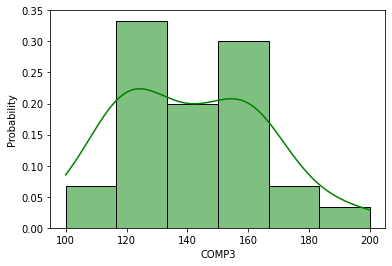

In [24]:
sns.histplot(colegioy, x='COMP3', bins=6, color='green', kde=True, stat='probability');

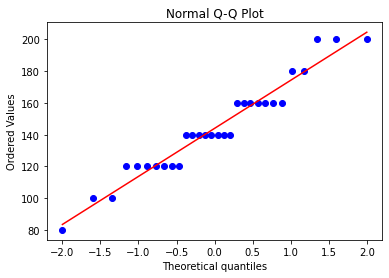

In [27]:
stats.probplot(colegioy['COMP5'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

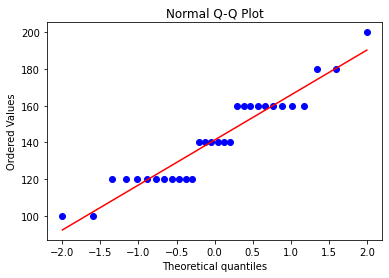

In [28]:
stats.probplot(colegioy['COMP3'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

### 5) Homogenidade das variências (Homocedastidade)

#### Variabilidade dos erros constante.

##### Ho = variâncias homogêneas: p > 0.05
##### Ha = variância não homogênias: p <= 0.05

In [29]:
from scipy.stats import levene

In [31]:
stat, p = levene(colegioy.COMP3, colegioy.COMP5, center='mean')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 0.61
p-valor: 0.4382667191


### TESTE t-student
Comparação das médidas das notas dos componentes 3 e 5 da redação do colégio Y.

##### Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES: p > 0.05
###### Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES: p <= 0.05

In [36]:
stat, p = stats.ttest_ind(colegioy['COMP3'], colegioy['COMP5'], equal_var=True)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: -0.38
p-valor: 0.7073512583


In [33]:
colegioy.COMP3.shape

(30,)

In [34]:
colegioy.COMP5.shape

(30,)

***Interpretação***

* Teste estatístico: -0,38
* p_valor = 0,707

Conclusão: Estatisticamente, com intervalo de confiança de 95%, a média do componente 3 de redação não é diferente da média do componente 5 com relação ao colégio y.